In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv("D:\Asif\DATA SET\Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


replacing blank with zero in TotalCharges column as tenure is zero and TotalCharges is zero
and also converting datatype as float earlier it was object

In [19]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0").astype("float")

In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

analysis of descriptive analysis

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


checking for duplicate item on row basis and column basis and here we got no duplicate items

In [25]:
df.duplicated().sum()
df["customerID"].duplicated().sum()

0

In [38]:
def convo(value):
    if value == 1:
        return "yes"
    else:
        return "No"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(convo)   
    

Converting 0 and value of senior citizen to yes/no to make it easior to understand 

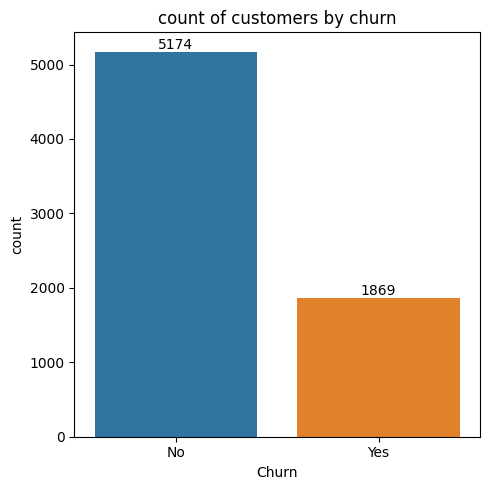

In [122]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("count of customers by churn")
plt.tight_layout()
plt.show()

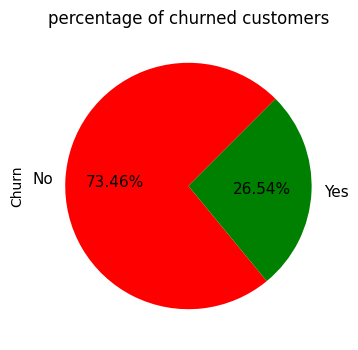

In [105]:
plt.figure(figsize=(6,4))
df2=df.groupby("Churn")["customerID"].count()
df2.plot.pie(ylabel="Churn",autopct="%.2f%%",startangle=45,fontsize='11',colors=["Red","Green"])
plt.title("percentage of churned customers")
plt.show()

from the given pie chart we can conclude that 26.54 customer have churned out now lets explore the reason behind it

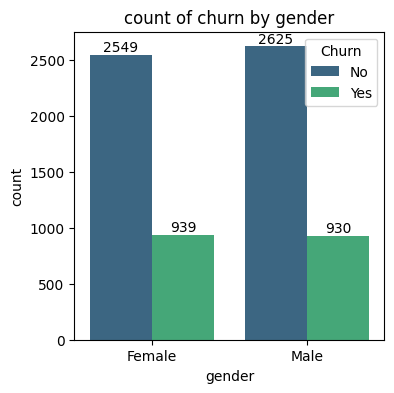

In [121]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="gender",data=df,hue="Churn",palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.title("count of churn by gender")
plt.show()

in gender wise there is slightly changes in churn

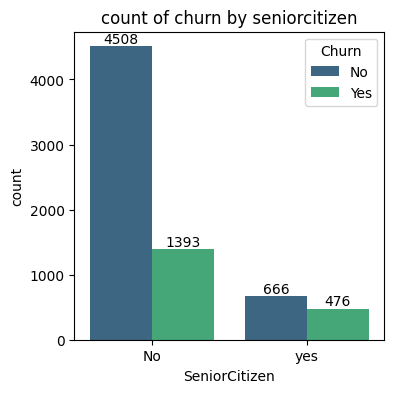

In [145]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="SeniorCitizen",data=df,hue="Churn",palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.title("count of churn by seniorcitizen")
plt.show()

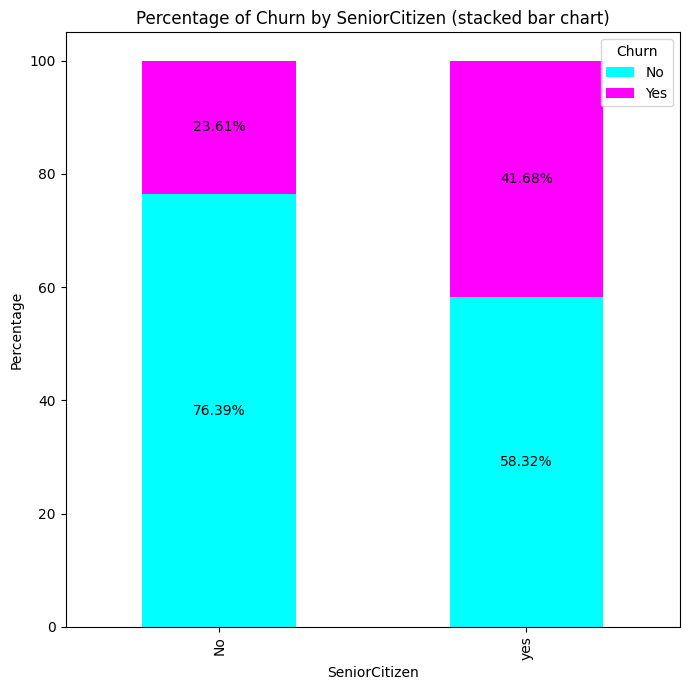

In [ ]:
grouped = df.groupby(["SeniorCitizen", "Churn"]).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
percentages.plot(kind="bar", stacked=True, figsize=(7, 7), colormap="cool")
for i, bars in enumerate(percentages.values):
    bottom = 0
    for j, value in enumerate(bars):
        plt.text(i, bottom + value / 2, f"{value:.2f}%", ha="center", va="center", fontsize=10)
        bottom += value
plt.title("Percentage of Churn by SeniorCitizen (stacked bar chart)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn", loc="upper right")
plt.tight_layout()
plt.show()

comparatively a greater percentage of people in senior citizen have churned

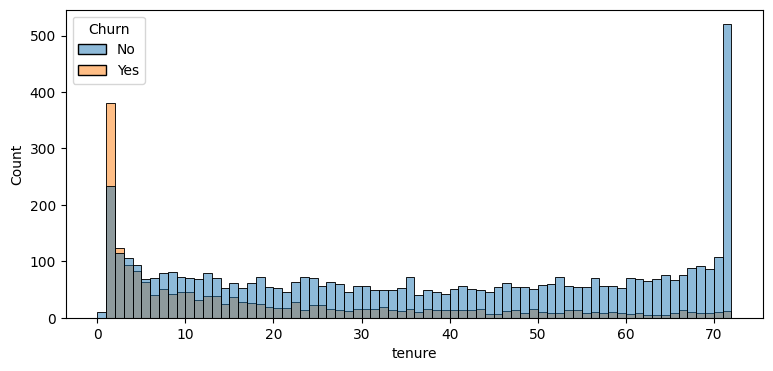

In [160]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,hue="Churn",bins=72)
plt.show()

Customers who have been using our services for a long time tend to stay, while those who have used our services for only 1 month or a few months are more likely to churn.

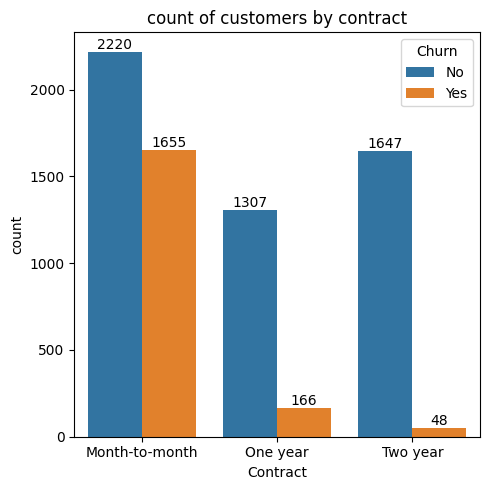

In [163]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("count of customers by contract")
plt.tight_layout()
plt.show()

We found that out of 1,695 customers with a two-year contract, only 48 churned. Similarly, out of 1,473 customers with a one-year contract, 166 churned. However, among 3,876 customers with month-to-month contracts, 1,655 churned. This shows that we need to focus on encouraging customers to choose longer contracts to help reduce the churn rate.

In [165]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

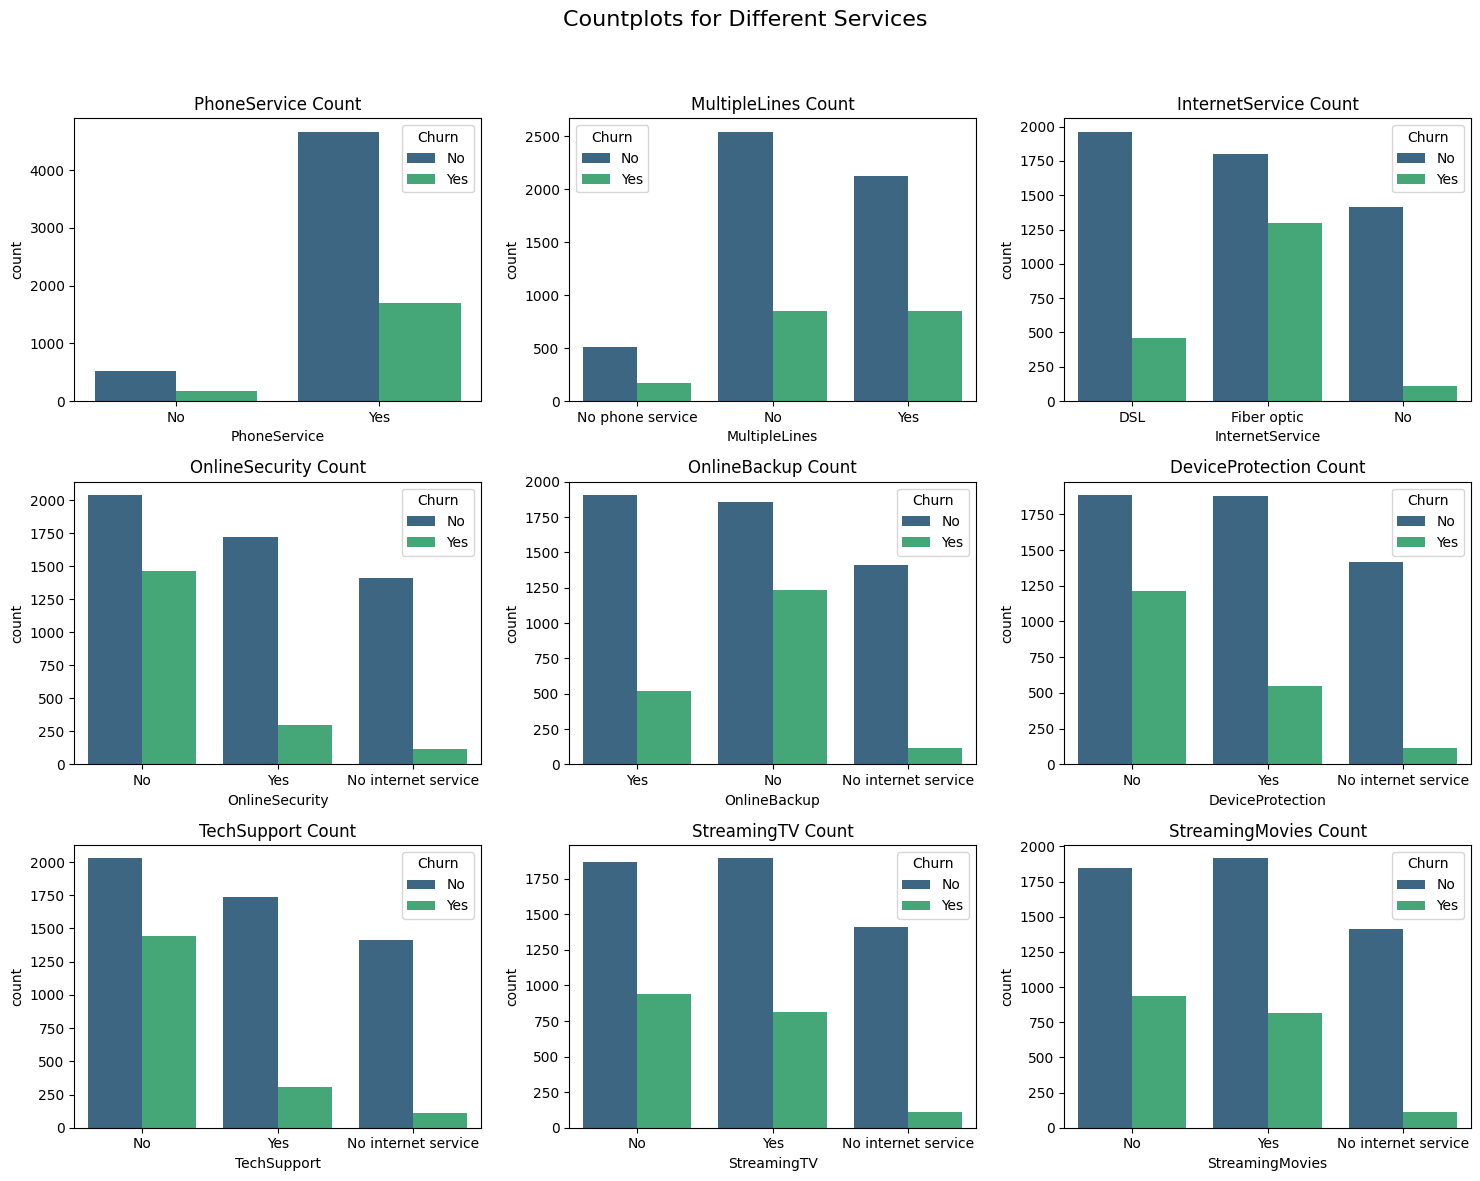

In [170]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
fig.suptitle("Countplots for Different Services", fontsize=16)

for i, col in enumerate(columns):
    ax = axes[i // cols, i % cols]  
    sns.countplot(data=df, x=col, ax=ax, hue=df["Churn"], palette="viridis")
    ax.set_title(f"{col} Count")
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


The charts show how churn varies across different services. Customers with fiber optic internet and those not using services like OnlineSecurity or TechSupport tend to churn more. On the other hand, customers who use additional services are less likely to churn. This suggests that offering better service options could help reduce churn.

Text(0.5, 1.0, 'Churn Customer by Payment Method')

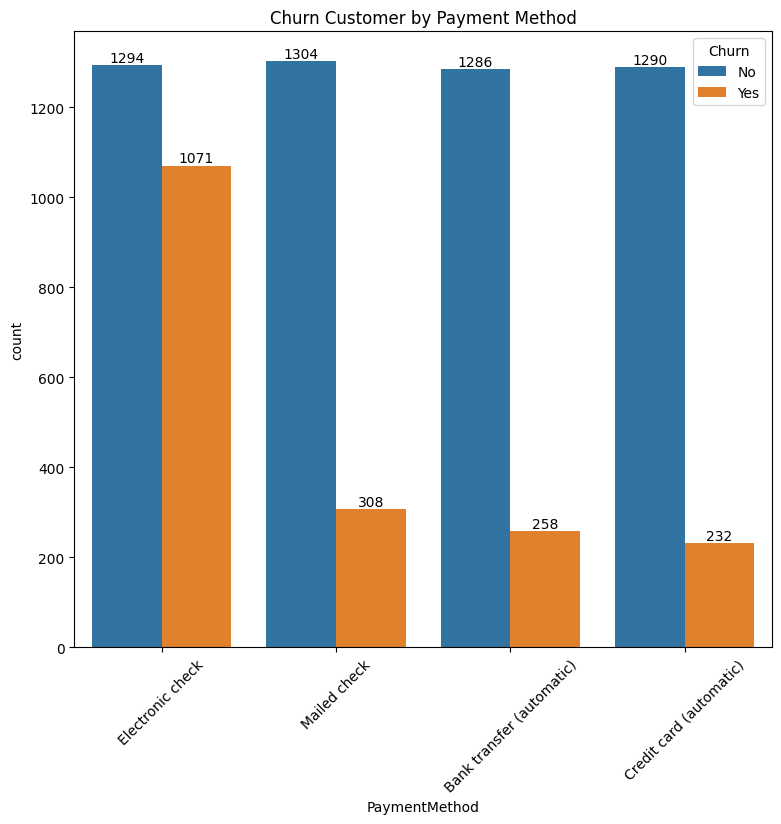

In [189]:
plt.figure(figsize=(9,8))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.title("Churn Customer by Payment Method")

customer is likely to churn when he is using electronic check as payment method